**Import Libraries**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**Generate the Dataset**

In [17]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic data for each feature
data = {
    "LotArea": np.random.randint(3000, 20000, num_samples),                 # Lot area in square feet
    "OverallQual": np.random.randint(1, 10, num_samples),                   # Overall quality (1 to 10 scale)
    "YearBuilt": np.random.randint(1900, 2021, num_samples),                # Year built
    "TotalBsmtSF": np.random.randint(500, 3000, num_samples),               # Basement area in square feet
    "GrLivArea": np.random.randint(600, 4000, num_samples),                 # Above ground living area in square feet
    "FullBath": np.random.randint(1, 4, num_samples),                       # Number of full bathrooms
    "GarageCars": np.random.randint(0, 3, num_samples),                     # Number of garage cars
    "GarageArea": np.random.randint(0, 1000, num_samples)                   # Garage area in square feet
}

# Generate the target variable, SalePrice
# We assume that house price depends on these features with some random noise
data["SalePrice"] = (
    data["LotArea"] * 0.1 +
    data["OverallQual"] * 10000 +
    (2021 - data["YearBuilt"]) * -200 +
    data["TotalBsmtSF"] * 0.3 +
    data["GrLivArea"] * 0.5 +
    data["FullBath"] * 5000 +
    data["GarageCars"] * 8000 +
    np.random.normal(0, 20000, num_samples)   # Add some noise
).astype(int)

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())

# Save to CSV
df.to_csv("synthetic_house_prices.csv", index=False)
print("Dataset saved as synthetic_house_prices.csv")


   LotArea  OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  \
0    18795            1       1922          625       2548         2   
1     3860            1       1987         2942       1545         3   
2     8390            9       1943         1316       1977         2   
3    14964            8       1976         2329       2122         2   
4    14284            9       1921         1075        740         1   

   GarageCars  GarageArea  SalePrice  
0           1         299     -13189  
1           0         907      33751  
2           0         601      96059  
3           0         356      66596  
4           2         255     122458  
Dataset saved as synthetic_house_prices.csv


**Visualize Key Features**

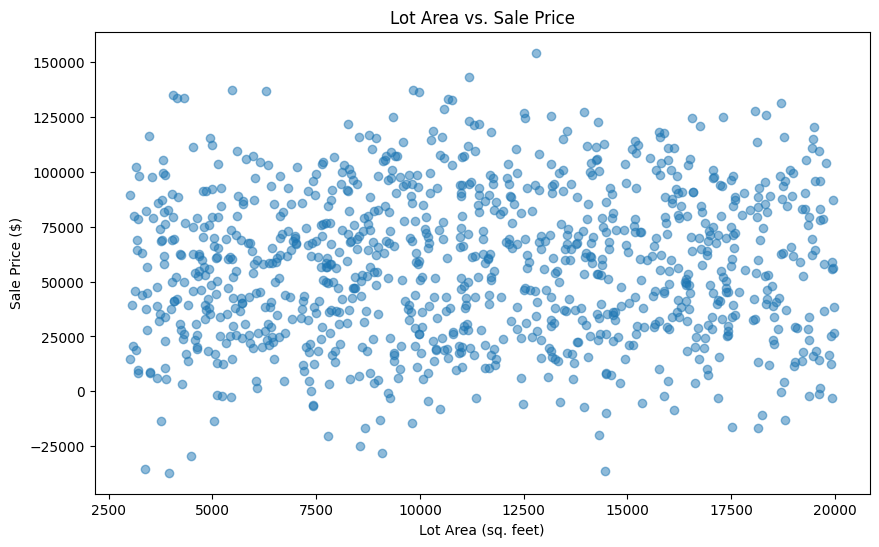

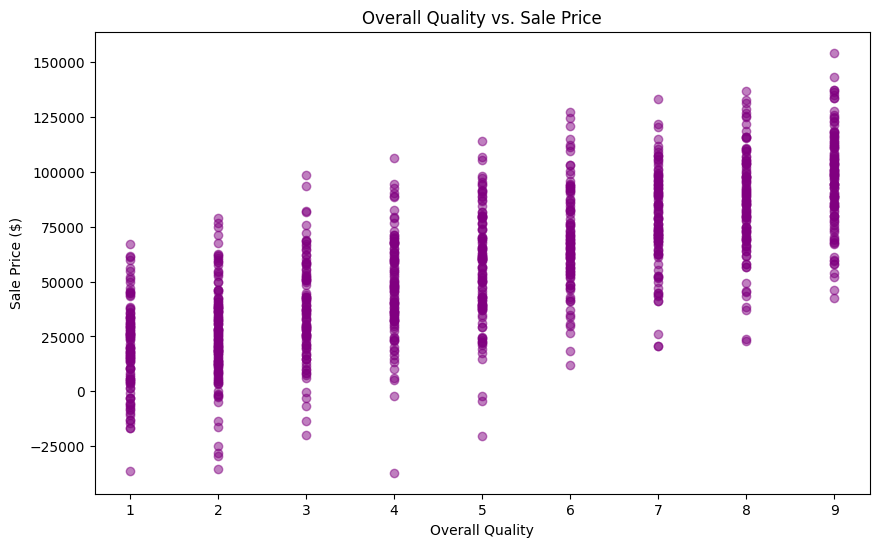

In [18]:
# Plotting LotArea vs. SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(df['LotArea'], df['SalePrice'], alpha=0.5)
plt.xlabel("Lot Area (sq. feet)")
plt.ylabel("Sale Price ($)")
plt.title("Lot Area vs. Sale Price")
plt.show()

# Plotting OverallQual vs. SalePrice
plt.figure(figsize=(10, 6))
plt.scatter(df['OverallQual'], df['SalePrice'], alpha=0.5, color='purple')
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price ($)")
plt.title("Overall Quality vs. Sale Price")
plt.show()


In [19]:
# Display basic information about the dataset
print(df.head())
print(df.info())
print(df.describe())

   LotArea  OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  \
0    18795            1       1922          625       2548         2   
1     3860            1       1987         2942       1545         3   
2     8390            9       1943         1316       1977         2   
3    14964            8       1976         2329       2122         2   
4    14284            9       1921         1075        740         1   

   GarageCars  GarageArea  SalePrice  
0           1         299     -13189  
1           0         907      33751  
2           0         601      96059  
3           0         356      66596  
4           2         255     122458  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotArea      1000 non-null   int64
 1   OverallQual  1000 non-null   int64
 2   YearBuilt    1000 non-null   int64
 3   TotalBsmtSF  1000 non-n

**Select and Preprocess Features**

In [20]:
# Selecting features for prediction
features = ['LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']
target = 'SalePrice'

# Filter the DataFrame
df = df[features + [target]]

# Handle missing values by filling or dropping (simple approach here)
df = df.dropna()

# Splitting features and target
X = df[features]
y = df[target]


**Split Data into Training and Test Sets**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Train the Linear Regression Model**

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Evaluate Model Performance**

In [23]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 400628911.34337777
Mean Absolute Error: 15795.120117594914
R-squared: 0.6712334735095213


**Visualize the Results**

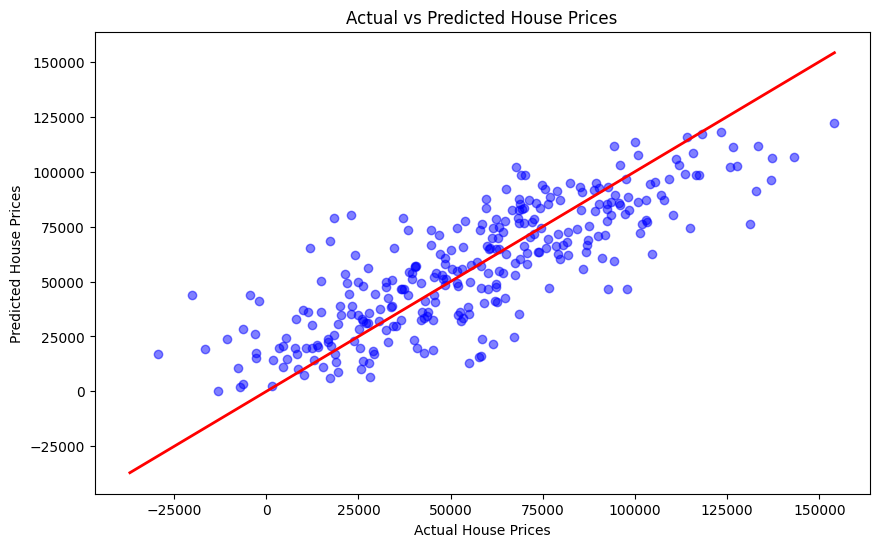

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Reference line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


**Analyze Model Residuals**

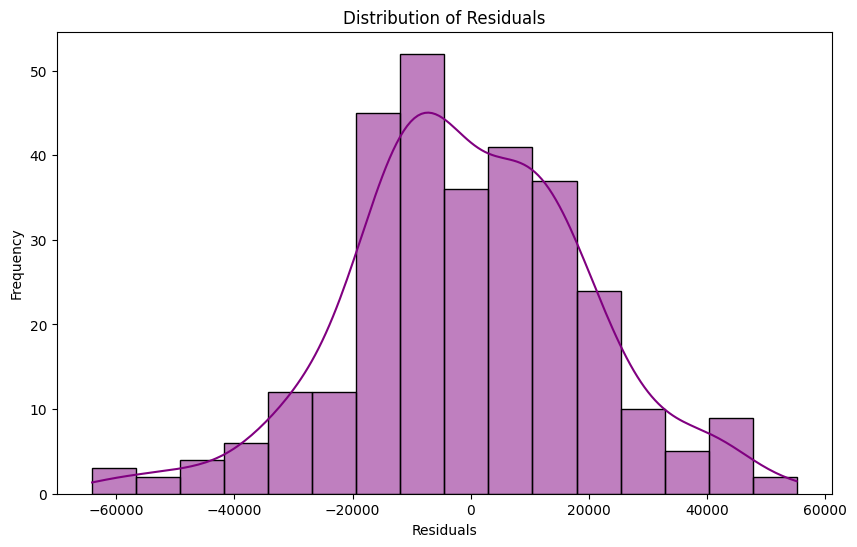

In [25]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

**Use the Model for Future Predictions**

In [26]:
# Example new data for prediction
new_data = pd.DataFrame({
    'LotArea': [8000],
    'OverallQual': [7],
    'YearBuilt': [2005],
    'TotalBsmtSF': [1500],
    'GrLivArea': [1800],
    'FullBath': [2],
    'GarageCars': [2],
    'GarageArea': [500]
})

# Predict using the model
new_price_prediction = model.predict(new_data)
print(f"Predicted Sale Price: ${new_price_prediction[0]:,.2f}")


Predicted Sale Price: $93,455.73
